In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
digits = datasets.load_digits()

X = pd.DataFrame(data=digits.data)
y = pd.DataFrame(data=digits.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


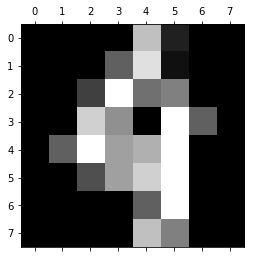

In [20]:
plt.gray()
plt.matshow(digits.images[24])

In [9]:
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier())
])

parameters = [
    {
        'clf': [DecisionTreeClassifier()],
        'clf__max_depth': [3, 4, 5, 6],
        'clf__min_samples_split': [2, 10, 50, 100]
    },
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [10, 20, 30],
    }
]

grid = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1, cv=10)
grid.fit(X_train, y_train.values.ravel())
print(grid.best_score_)
print(grid.score(X_test, y_test))



0.9592684954280964
{'clf': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False), 'clf__n_estimators': 30}
0.9663299663299664


In [ ]:
pipeline = Pipeline([
    ('select', SelectKBest()),
    ('clf', RandomForestClassifier())
])

parameters = {
    'select__k': np.arange(45, 55),
    'select__score_func': [chi2],
    'clf__n_estimators': [10, 20]
}

grid = GridSearchCV(pipeline, param_grid=parameters, n_jobs=-1, cv=10)
grid.fit(X_train, y_train.values.ravel())

test_score = grid.score(X_test, y_test)
print(grid.best_params_)
print(f'Best Score: {grid.best_score_}, \nTest Score: {test_score}')

{'clf__n_estimators': 20, 'select__k': 47, 'select__score_func': <function chi2 at 0x1090fc730>}
Best Score: 0.9600997506234414, 
Test Score: 0.9629629629629629


In [ ]:
t = RandomForestClassifier(n_estimators=20)